In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
data=pd.read_csv("Task_2.csv")

In [3]:
data.drop(["Cabin","Embarked","Name","Ticket"],axis=1,inplace=True)

In [48]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,male,22.0,1,0,7.2500
1,2,1,1,female,38.0,1,0,71.2833
2,3,1,3,female,26.0,0,0,7.9250
3,4,1,1,female,35.0,1,0,53.1000
4,5,0,3,male,35.0,0,0,8.0500


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [27]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [ ]:
#Fill the null value of age column with mean value of age 

In [16]:
data["Age"]=data["Age"].fillna(data["Age"].mean())

In [28]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [29]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
#Converting the Name into 0's and 1's
#Male=0 and Female=1

In [50]:
data["Sex"]=data["Sex"].map({"male":0,"female":1})

In [52]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,0,22.0,1,0,7.2500
1,2,1,1,1,38.0,1,0,71.2833
2,3,1,3,1,26.0,0,0,7.9250
3,4,1,1,1,35.0,1,0,53.1000
4,5,0,3,0,35.0,0,0,8.0500


In [51]:
corr=data.corr()

In [53]:
corr

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,-0.042939,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,0.543351,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.131900,-0.369226,0.083081,0.018443,-0.549500
Sex,-0.042939,0.543351,-0.131900,1.000000,-0.093254,0.114631,0.245489,0.182333
Age,0.036847,-0.077221,-0.369226,-0.093254,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,0.114631,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,0.245489,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.182333,0.096067,0.159651,0.216225,1.000000


In [ ]:
#HeatMap

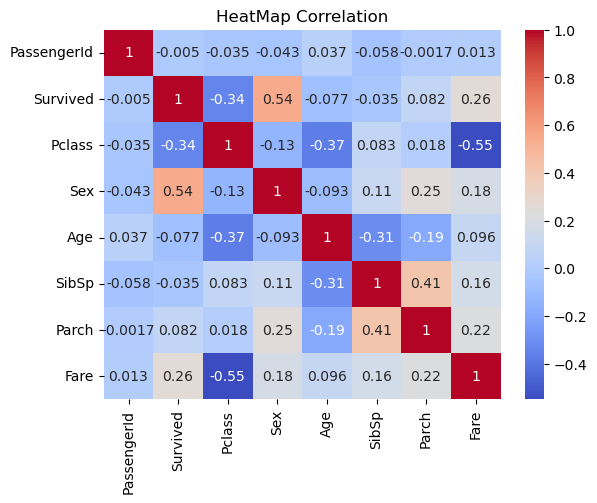

In [54]:
sb.heatmap(corr,annot=True,cmap="coolwarm")
plt.title("HeatMap Correlation")
plt.show()

In [74]:
print("0-Male||1-Female")
data["Sex"].value_counts()

0-Male||1-Female


Sex
0    577
1    314
Name: count, dtype: int64

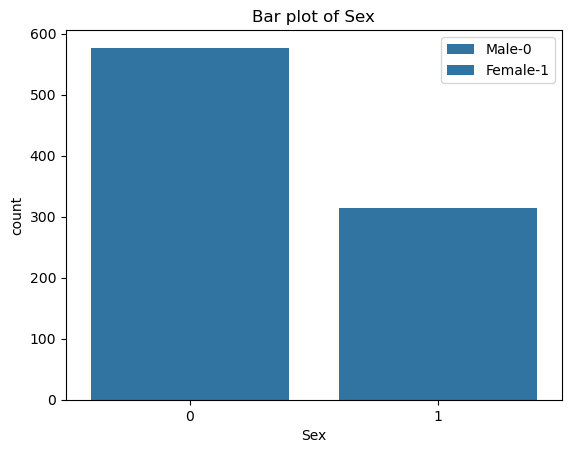

In [65]:
sb.countplot(x=data["Sex"],label=["Male-0","Female-1"])
plt.title("Bar plot of Sex")
plt.legend()
plt.show()

In [80]:
print("0-Not Survived||1-Survived")
data["Survived"].value_counts()

0-Not Survived||1-Survived


Survived
0    549
1    342
Name: count, dtype: int64

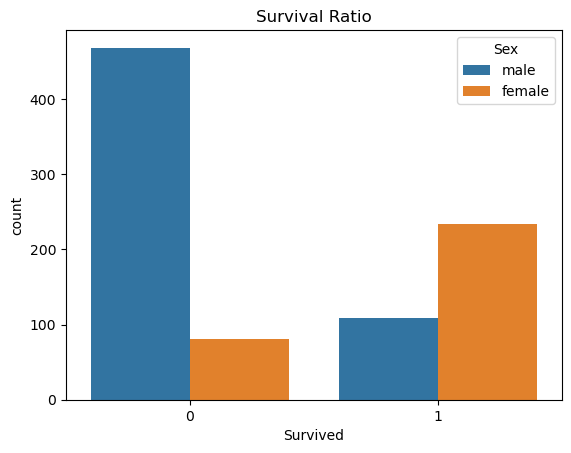

In [127]:
sb.countplot(x=data["Survived"],hue=data["Sex"])
plt.title("Survival Ratio")
plt.show()

In [125]:
survived_ratio=pd.crosstab(data["Sex"],data["Survived"])
print("0-Died||1-Survived")
survived_ratio

0-Died||1-Survived


Survived,0,1
Sex,,
female,81,233
male,468,109


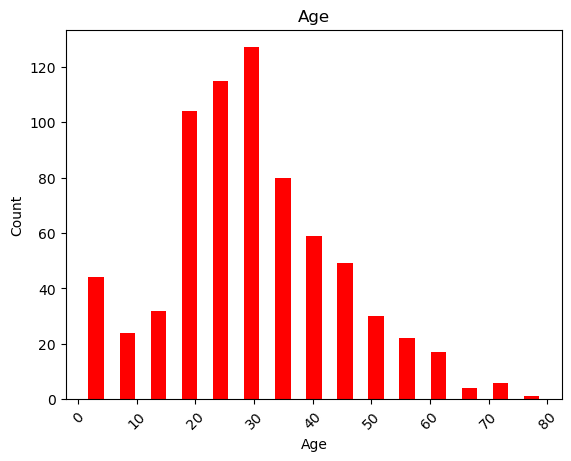

In [37]:
plt.hist(x=data["Age"],bins=15,color="red",rwidth=0.5)
plt.title("Age")
plt.ylabel("Count")
plt.xlabel("Age")
plt.xticks(rotation=45)
plt.show()

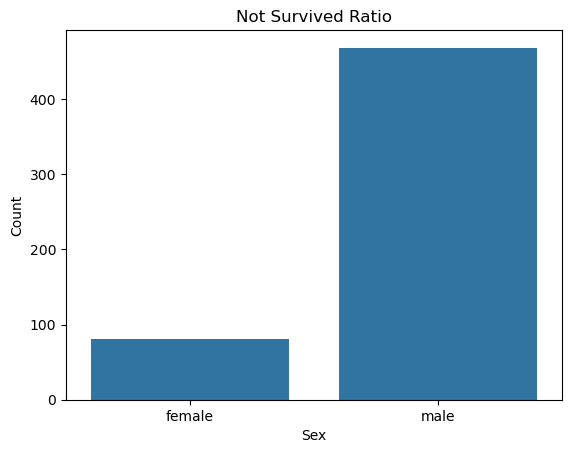

In [66]:
sb.barplot(survived_ratio[0])
plt.title("Not Survived Ratio")
plt.ylabel("Count")
plt.show()

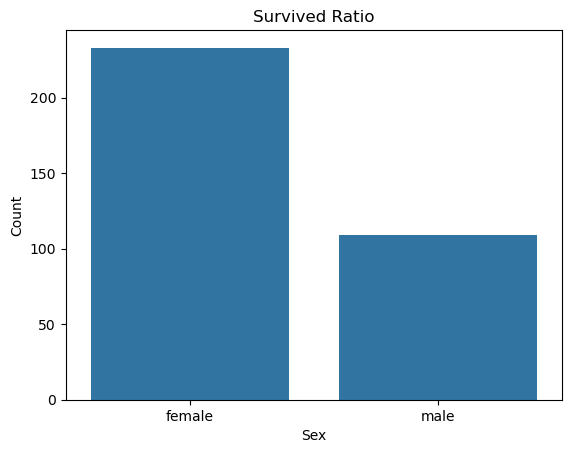

In [67]:
sb.barplot(survived_ratio[1])
plt.title("Survived Ratio")
plt.ylabel("Count")
plt.show()

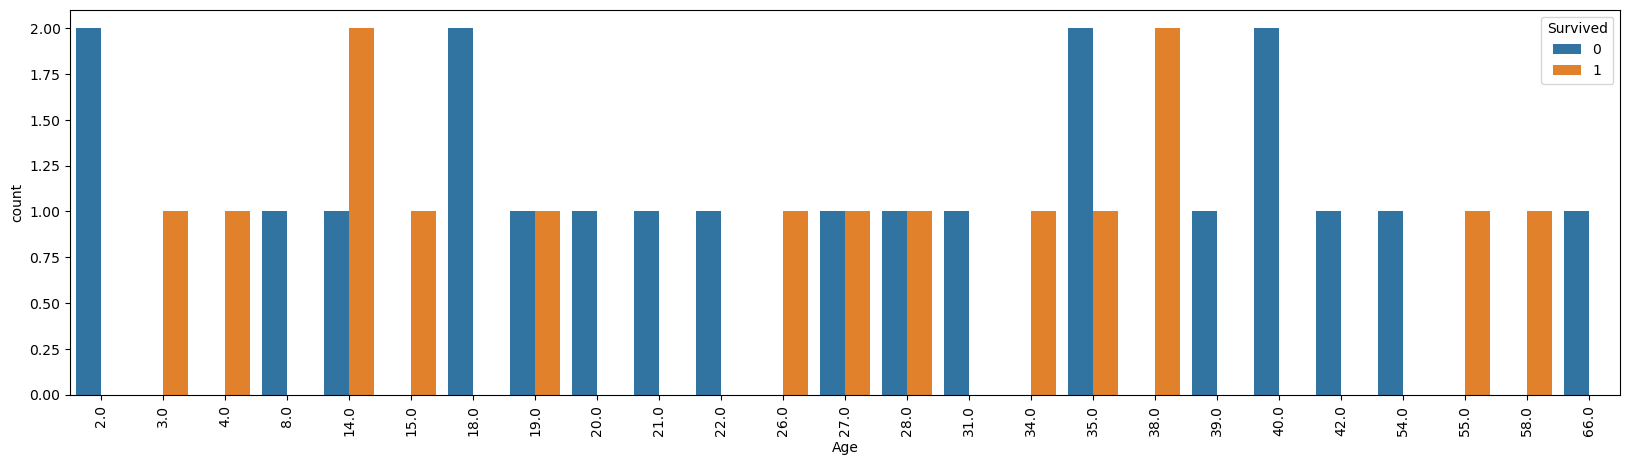

In [120]:
plt.figure(figsize=(20,5))
sb.countplot(x=data["Age"][:50],hue=data["Survived"])
plt.xticks(rotation=90)
plt.show()

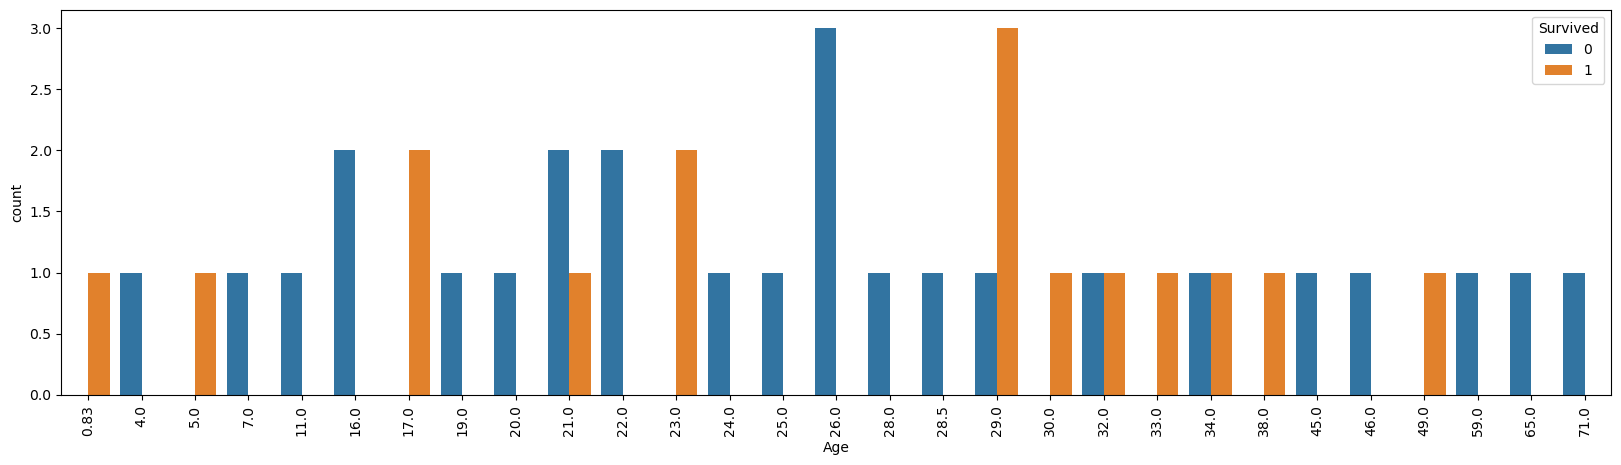

In [121]:
plt.figure(figsize=(20,5))
sb.countplot(x=data["Age"][50:100],hue=data["Survived"])
plt.xticks(rotation=90)
plt.show()

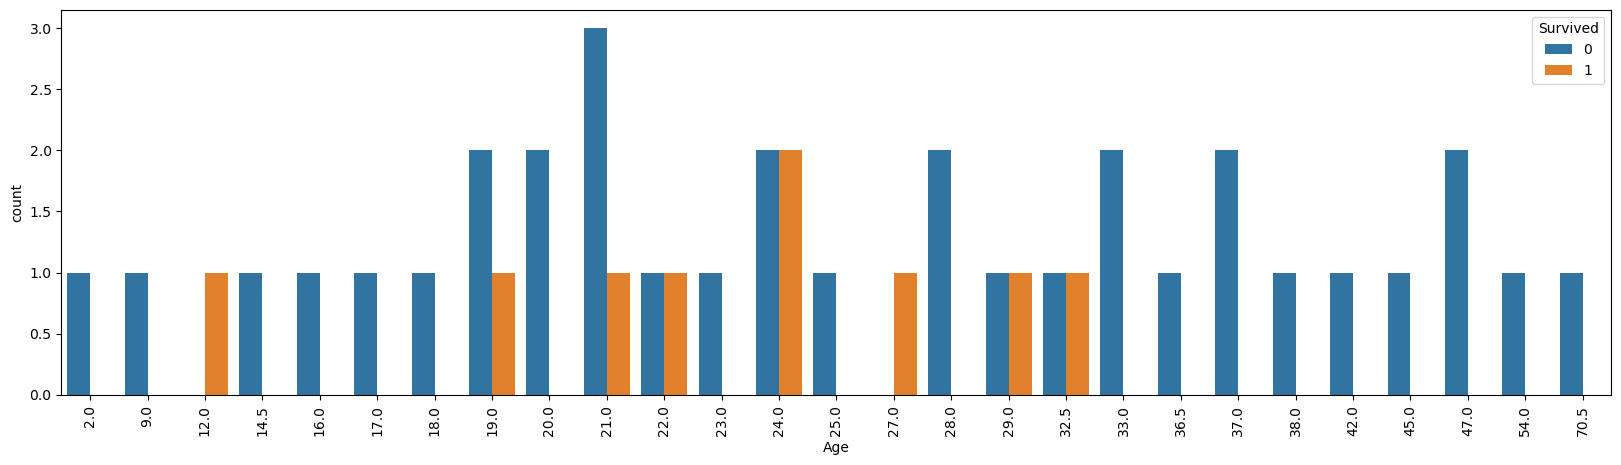

In [123]:
plt.figure(figsize=(20,5))
sb.countplot(x=data["Age"][100:150],hue=data["Survived"])
plt.xticks(rotation=90)
plt.show()

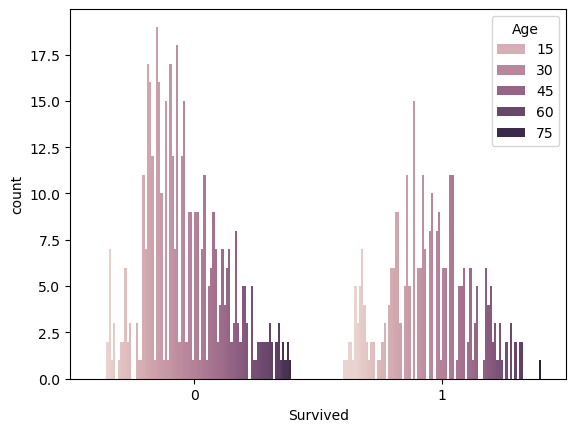

In [95]:
sb.countplot(x=data["Survived"],hue=data["Age"])
plt.show()

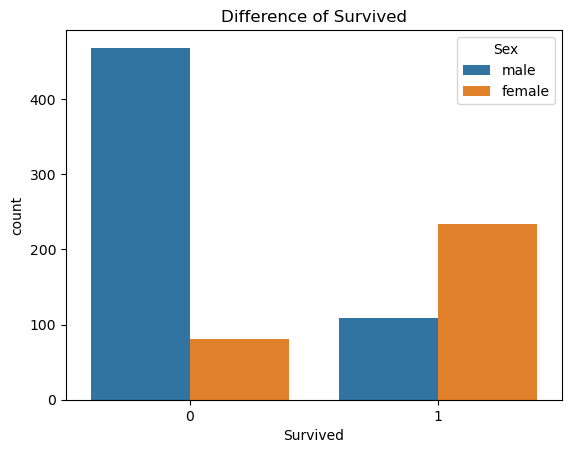

In [99]:
sb.countplot(x=data["Survived"],hue=data["Sex"])
plt.title("Difference of Survived")
plt.show()

The clearly Explains that women were Survived more than man in Titanic Ship 